## Group 26:
    Minjia Li
    Jay Mahn
    Jiahui Liu
    Lu Zeng

# Train_data

## Data Cleaning

### CurrentTask, LastTaskCompleted-Encoding 

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.impute import KNNImputer

train_data_path = 'data/train_data.csv'
train_df = pd.read_csv(train_data_path)

label_encoder = LabelEncoder()

if train_df['CurrentTask'].dtype == 'object':
    train_df['CurrentTask'] = label_encoder.fit_transform(train_df['CurrentTask'].astype(str))

if train_df['LastTaskCompleted'].dtype == 'object':
    train_df['LastTaskCompleted'] = label_encoder.fit_transform(train_df['LastTaskCompleted'].astype(str))

output_file_path = 'train_data_knn_imputed.csv'
train_df.to_csv(output_file_path, index=False)

### CurrentTask, LastTaskCompleted-KNN

In [3]:
import numpy as np

train_data = pd.read_csv('train_data_knn_imputed.csv')

# Select the two features 'CurrentTask_TargetEncoded' and 'LastTaskCompleted_TargetEncoded'
features_to_impute = ['CurrentTask', 'LastTaskCompleted']

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
imputed_data = imputer.fit_transform(train_data[features_to_impute])

# Transfer the filled data back to the DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=features_to_impute, index=train_data.index)

# Re-assign the filled features back to the original dataset
train_data[features_to_impute] = imputed_df[features_to_impute]

print("Processed training data with imputed values:")
print(train_data.head())

# Save the imputed data to a new csv file
train_output_file_path = 'train_data_knn_imputed.csv'
train_data.to_csv(train_output_file_path, index=False)


Processed training data with imputed values:
  UserID    QuestionTiming              TimeUtc CurrentGameMode  CurrentTask  \
0     p1    User Initiated  2022-08-18 22:55:27             NaN         49.0   
1     p1  System Initiated  2022-08-18 23:38:31             NaN         49.0   
2     p1    User Initiated  2022-08-18 23:39:24          Career         21.0   
3     p1  System Initiated  2022-08-18 23:45:01          Career         33.0   
4     p1  System Initiated  2022-08-18 23:51:22          Career         33.0   

   CurrentSessionLength  LastTaskCompleted  LevelProgressionAmount  \
0                     2               51.0                     NaN   
1                     0               51.0                     NaN   
2                     1               32.0                1.000000   
3                     6               32.0                0.168267   
4                    13               32.0                0.429364   

  QuestionType  ResponseValue  
0    Wellbeing       

### CurrentGameMode-Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# load the data
train_data = pd.read_csv('train_data_knn_imputed.csv')
print(train_data['CurrentGameMode'].unique())

# Initialize LabelEncoder
le = LabelEncoder()

# Encoding 'CurrentGameMode' using Label Encoding
train_data['CurrentGameMode'] = le.fit_transform(train_data['CurrentGameMode'])

train_data.head()


[nan 'Career' 'Special' 'FreePlay' 'Challenge']


,UserID,QuestionTiming,TimeUtc,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,ResponseValue
0,p1,User Initiated,2022-08-18 22:55:27,4,49.0,2,51.0,NaN,Wellbeing,509.0
1,p1,System Initiated,2022-08-18 23:38:31,4,49.0,0,51.0,NaN,Wellbeing,653.0
2,p1,User Initiated,2022-08-18 23:39:24,0,21.0,1,32.0,1.000000,Wellbeing,705.0
3,p1,System Initiated,2022-08-18 23:45:01,0,33.0,6,32.0,0.168267,Wellbeing,817.0
4,p1,System Initiated,2022-08-18 23:51:22,0,33.0,13,32.0,0.429364,Wellbeing,810.0


### CurrentGameMode-KNN

In [5]:
# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Select feature 'CurrentGameMode_LabelEncoded' to be imputed
features_to_impute = ['CurrentGameMode', 'CurrentTask']

# Impute the missing values
imputed_data = imputer.fit_transform(train_data[features_to_impute])

# Transfer the filled data back to the DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=features_to_impute, index=train_data.index)

# Re-new the original 'CurrentGameMode_LabelEncoded' data 
train_data['CurrentGameMode'] = imputed_df['CurrentGameMode']

print("Processed training data with imputed CurrentGameMode:")
print(train_data.head())

# Save and renew the file
train_output_file_path = 'train_data_knn_imputed.csv'
train_data.to_csv(train_output_file_path, index=False)

Processed training data with imputed CurrentGameMode:
  UserID    QuestionTiming              TimeUtc  CurrentGameMode  CurrentTask  \
0     p1    User Initiated  2022-08-18 22:55:27              4.0         49.0   
1     p1  System Initiated  2022-08-18 23:38:31              4.0         49.0   
2     p1    User Initiated  2022-08-18 23:39:24              0.0         21.0   
3     p1  System Initiated  2022-08-18 23:45:01              0.0         33.0   
4     p1  System Initiated  2022-08-18 23:51:22              0.0         33.0   

   CurrentSessionLength  LastTaskCompleted  LevelProgressionAmount  \
0                     2               51.0                     NaN   
1                     0               51.0                     NaN   
2                     1               32.0                1.000000   
3                     6               32.0                0.168267   
4                    13               32.0                0.429364   

  QuestionType  ResponseValue  
0    W

### TimeUtc-Convert Format

In [6]:
train_data = pd.read_csv("train_data_knn_imputed.csv")

# Ensure TimeUtc is a datetime type
train_data['TimeUtc'] = pd.to_datetime(train_data['TimeUtc'])

# Extract components
train_data['Year'] = train_data['TimeUtc'].dt.year
train_data['Month'] = train_data['TimeUtc'].dt.month
train_data['Day'] = train_data['TimeUtc'].dt.day
train_data['Hour'] = train_data['TimeUtc'].dt.hour
train_data['Minute'] = train_data['TimeUtc'].dt.minute
train_data['Second'] = train_data['TimeUtc'].dt.second

# Separate weekday and weekend days
train_data['Weekday'] = train_data['TimeUtc'].dt.dayofweek
train_data['WeekendFlag'] = (train_data['TimeUtc'].dt.weekday >= 5).astype(int)

# Categorize different times of day into periods
time_bins = [0, 6, 12, 18, 24]  # Define time_bins as 0-6, 6-12, 12-18, 18-24
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
train_data['PeriodOfDay'] = pd.cut(train_data['TimeUtc'].dt.hour, bins=time_bins, labels=time_labels, right=False)

# Remove the original Timestamp column to avoid redundancy
train_data.drop('TimeUtc', axis=1, inplace=True)

train_data.head()

,UserID,QuestionTiming,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,ResponseValue,Year,Month,Day,Hour,Minute,Second,Weekday,WeekendFlag,PeriodOfDay
0,p1,User Initiated,4.0,49.0,2,51.0,NaN,Wellbeing,509.0,2022,8,18,22,55,27,3,0,Evening
1,p1,System Initiated,4.0,49.0,0,51.0,NaN,Wellbeing,653.0,2022,8,18,23,38,31,3,0,Evening
2,p1,User Initiated,0.0,21.0,1,32.0,1.000000,Wellbeing,705.0,2022,8,18,23,39,24,3,0,Evening
3,p1,System Initiated,0.0,33.0,6,32.0,0.168267,Wellbeing,817.0,2022,8,18,23,45,1,3,0,Evening
4,p1,System Initiated,0.0,33.0,13,32.0,0.429364,Wellbeing,810.0,2022,8,18,23,51,22,3,0,Evening


### TimeUtc-Encoding

In [7]:
#encoding for TimeOfDay.
train_data = pd.get_dummies(train_data, columns=['PeriodOfDay'], drop_first=False)

train_data.head()

,UserID,QuestionTiming,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,ResponseValue,Year,...,Day,Hour,Minute,Second,Weekday,WeekendFlag,PeriodOfDay_Night,PeriodOfDay_Morning,PeriodOfDay_Afternoon,PeriodOfDay_Evening
0,p1,User Initiated,4.0,49.0,2,51.0,NaN,Wellbeing,509.0,2022,...,18,22,55,27,3,0,False,False,False,True
1,p1,System Initiated,4.0,49.0,0,51.0,NaN,Wellbeing,653.0,2022,...,18,23,38,31,3,0,False,False,False,True
2,p1,User Initiated,0.0,21.0,1,32.0,1.000000,Wellbeing,705.0,2022,...,18,23,39,24,3,0,False,False,False,True
3,p1,System Initiated,0.0,33.0,6,32.0,0.168267,Wellbeing,817.0,2022,...,18,23,45,1,3,0,False,False,False,True
4,p1,System Initiated,0.0,33.0,13,32.0,0.429364,Wellbeing,810.0,2022,...,18,23,51,22,3,0,False,False,False,True


In [8]:
# Save the transformation and encoding for 'TimeUtc' to the 'train_data_knn_imputed.csv' 
train_output_file_path = 'train_data_knn_imputed.csv'
train_data.to_csv(train_output_file_path, index=False)

### LevelProgressionAmount-KNN

In [9]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
file_path = 'train_data_knn_imputed.csv'
df = pd.read_csv(file_path)

# Select the column to encode and impute
column_to_encode_and_impute = 'LevelProgressionAmount'

# Encode the column
label_encoder = LabelEncoder()
df[column_to_encode_and_impute] = label_encoder.fit_transform(df[column_to_encode_and_impute].astype(str))

# Create KNNImputer instance
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on the selected column
df[[column_to_encode_and_impute]] = imputer.fit_transform(df[[column_to_encode_and_impute]])

# Standardize the imputed column
scaler = StandardScaler()
df[[column_to_encode_and_impute]] = scaler.fit_transform(df[[column_to_encode_and_impute]])

# Save the modified data back to the original file
df.to_csv(file_path, index=False)

print(f'Successfully encoded and performed KNN imputation on {column_to_encode_and_impute}. The result has been saved back to the original file {file_path}')


Successfully encoded and performed KNN imputation on LevelProgressionAmount. The result has been saved back to the original file train_data_knn_imputed.csv


### QuestionTiming-Dummy

In [10]:
import pandas as pd

file_path = 'train_data_knn_imputed.csv'
df = pd.read_csv(file_path)

df_encoded = pd.get_dummies(df, columns=['QuestionTiming'])

df_encoded.to_csv(file_path, index=False)

print(f'{file_path}')


train_data_knn_imputed.csv


### Mapping UserID with ResponseValue

In [11]:
file_path = 'train_data_knn_imputed.csv'
df = pd.read_csv(file_path)

# average responsevalue per user
user_means = df.groupby('UserID')['ResponseValue'].mean()

# overall average responsevalue
global_mean = df['ResponseValue'].mean()

# Creating new feature using average responsevalue per user
df['UserAvgResponse'] = df['UserID'].map(user_means)

# imputing missing value
df['UserAvgResponse'].fillna(global_mean, inplace=True)

# save new feature to file
df.to_csv(file_path, index=False)

print(f'Successfully updated UserAvgResponse and saved the data back to the file {file_path}')

Successfully updated UserAvgResponse and saved the data back to the file train_data_knn_imputed.csv


### Userid-Label

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data_path = 'train_data_knn_imputed.csv'
train_df = pd.read_csv(train_data_path)

label_encoder = LabelEncoder()

train_df['UserID'] = label_encoder.fit_transform(train_df['UserID'])

output_file_path = 'train_data_knn_imputed.csv'
train_df.to_csv(output_file_path, index=False)

print(train_df.head())


   UserID  CurrentGameMode  CurrentTask  CurrentSessionLength  \
0       0              4.0         49.0                     2   
1       0              4.0         49.0                     0   
2       0              0.0         21.0                     1   
3       0              0.0         33.0                     6   
4       0              0.0         33.0                    13   

   LastTaskCompleted  LevelProgressionAmount QuestionType  ResponseValue  \
0               51.0                1.277095    Wellbeing          509.0   
1               51.0                1.277095    Wellbeing          653.0   
2               32.0                1.276479    Wellbeing          705.0   
3               32.0               -1.295813    Wellbeing          817.0   
4               32.0               -0.521869    Wellbeing          810.0   

   Year  Month  ...  Second  Weekday  WeekendFlag  PeriodOfDay_Night  \
0  2022      8  ...      27        3            0              False   
1  2022 

## Feature Importance

#### CurrentGameMode

In [53]:
train_data = pd.read_csv('train_data_knn_imputed.csv')
# Fit the model
model = ols('ResponseValue ~ C(CurrentGameMode)', data=train_data).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

# Print the ANOVA table
print(anova_results)

                          sum_sq        df           F  PR(>F)
C(CurrentGameMode)  1.304125e+08       4.0  735.572934     0.0
Residual            5.957734e+09  134415.0         NaN     NaN


#### QuestionTiming

In [56]:
from scipy.stats import pointbiserialr

train_data = pd.read_csv('train_data_knn_imputed.csv')

# Calculate point-biserial correlation
correlation, p_value = pointbiserialr(train_data['QuestionTiming_System Initiated'], train_data['ResponseValue'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: 0.025074037858450724, P-value: 3.773108096097224e-20


In [58]:
from scipy.stats import pointbiserialr

train_data = pd.read_csv('train_data_knn_imputed.csv')

# Calculate point-biserial correlation
correlation, p_value = pointbiserialr(train_data['QuestionTiming_User Initiated'], train_data['ResponseValue'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: -0.025074037858450724, P-value: 3.773108096097224e-20


#### CurrentSessionLength

In [59]:
correlation = train_data['CurrentSessionLength'].corr(train_data['ResponseValue'])
print(f'Correlation between CurrentSessionLength and ResponseValue: {correlation}')

Correlation between CurrentSessionLength and ResponseValue: 0.060919849473147006


#### CurrentTask & LastTaskCompleted

In [60]:
train_data = pd.read_csv('train_data_knn_imputed.csv')

corr_current_task = train_data['CurrentTask'].corr(train_data['ResponseValue'])
corr_last_task_completed = train_data['LastTaskCompleted'].corr(train_data['ResponseValue'])

print(f'Correlation between CurrentTask and ResponseValue: {corr_current_task}')
print(f'Correlation between LastTaskCompleted and ResponseValue: {corr_last_task_completed}')

Correlation between CurrentTask and ResponseValue: -0.0935093415481444
Correlation between LastTaskCompleted and ResponseValue: -0.06294934479613248


#### LevelProgressionAmount

In [61]:
correlation = train_data['LevelProgressionAmount'].corr(train_data['ResponseValue'])
print(f'Correlation between LevelProgressionAmount and ResponseValue: {correlation}')

Correlation between LevelProgressionAmount and ResponseValue: -0.0508105841171102


#### TimeUtc

##### Weekday

In [62]:
weekday_unique_values = train_data['Weekday'].unique()
print(weekday_unique_values)

from scipy.stats import f_oneway

grouped_data = [train_data[train_data['Weekday'] == i]['ResponseValue'] for i in range(7)]

f_stat, p_val = f_oneway(*grouped_data)
print('F-statistic:', f_stat)
print('P-value:', p_val)

[3 4 5 6 0 2 1]
F-statistic: 9.982346547601745
P-value: 4.757252476160118e-11


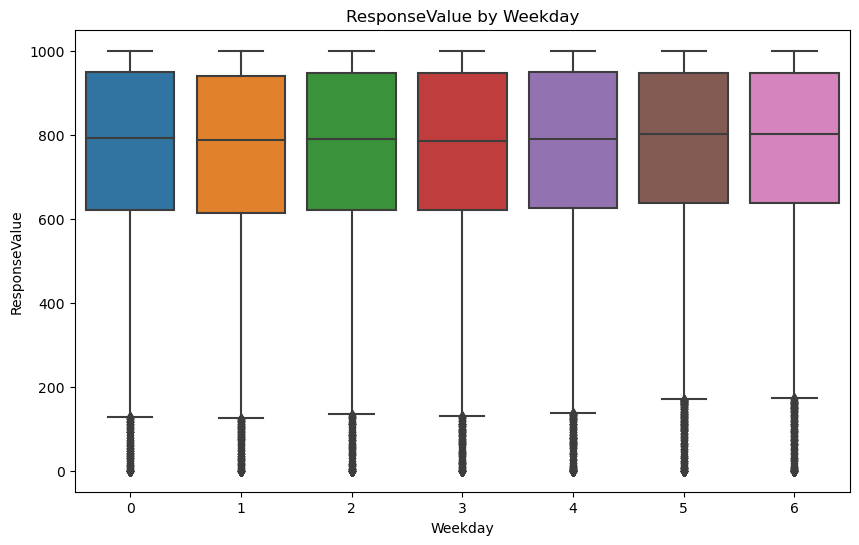

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='ResponseValue', data=train_data)
plt.title('ResponseValue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('ResponseValue')
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -4.5432 0.4142 -11.2391  2.1527  False
     0      2  -0.6859 0.9999   -7.377  6.0052  False
     0      3  -3.1834 0.7864  -9.7533  3.3864  False
     0      4   0.2729    1.0  -6.0571  6.6029  False
     0      5   6.4562 0.0382   0.1944  12.718   True
     0      6   8.4067 0.0017   2.0817 14.7317   True
     1      2   3.8573 0.6415  -2.9846 10.6992  False
     1      3   1.3598 0.9969  -5.3636  8.0832  False
     1      4   4.8161 0.3018  -1.6731 11.3053  False
     1      5  10.9994    0.0   4.5767 17.4221   True
     1      6  12.9499    0.0   6.4655 19.4343   True
     2      3  -2.4975 0.9295  -9.2161  4.2211  False
     2      4   0.9588 0.9995  -5.5255  7.4431  False
     2      5   7.1421 0.0179   0.7243 13.5598   True
     2      6   9.0926 0.0007   2.6132 15.5721   True
     3      4   3.4563 0.680

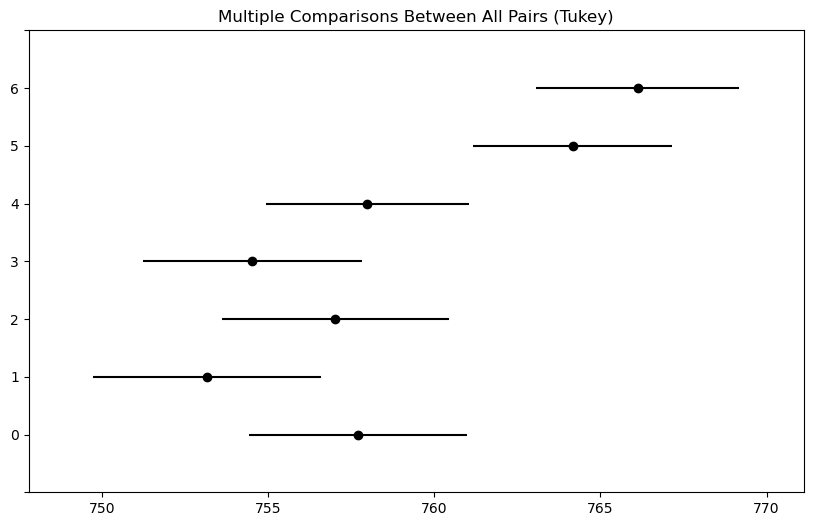

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=train_data['ResponseValue'], groups=train_data['Weekday'], alpha=0.05)
print(tukey)

tukey.plot_simultaneous()
plt.show()

##### Weekend

[0 1]
Point-Biserial Correlation: 0.019626286413512523, P-value: 6.187889079493329e-13
Mean on Weekdays: 756.1773873369965, Mean on Weekends: 765.1190305497098
T-statistic: -7.196983488263627, P-value: 6.187889079510141e-13


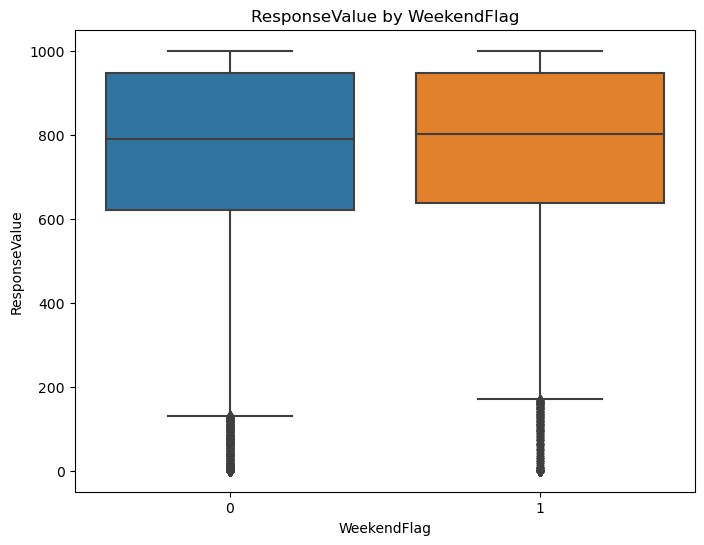

In [65]:
from scipy.stats import pointbiserialr, ttest_ind

WeekendFlag_unique_values = train_data['WeekendFlag'].unique()
print(WeekendFlag_unique_values)

correlation, p_value = pointbiserialr(train_data['WeekendFlag'], train_data['ResponseValue'])
print(f"Point-Biserial Correlation: {correlation}, P-value: {p_value}")

mean_weekday = train_data[train_data['WeekendFlag'] == 0]['ResponseValue'].mean()
mean_weekend = train_data[train_data['WeekendFlag'] == 1]['ResponseValue'].mean()
print(f"Mean on Weekdays: {mean_weekday}, Mean on Weekends: {mean_weekend}")

group_weekday = train_data[train_data['WeekendFlag'] == 0]['ResponseValue']
group_weekend = train_data[train_data['WeekendFlag'] == 1]['ResponseValue']
t_stat, p_val = ttest_ind(group_weekday, group_weekend)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekendFlag', y='ResponseValue', data=train_data)
plt.title('ResponseValue by WeekendFlag')
plt.xlabel('WeekendFlag')
plt.ylabel('ResponseValue')
plt.show()

##### Period of day

In [66]:
import statsmodels.formula.api as smf

formula = 'ResponseValue ~ PeriodOfDay_Afternoon + PeriodOfDay_Evening + PeriodOfDay_Night'

model = smf.ols(formula, data=train_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          ResponseValue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.86
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.13e-09
Time:                        23:21:16   Log-Likelihood:            -9.1126e+05
No. Observations:              134420   AIC:                         1.823e+06
Df Residuals:                  134416   BIC:                         1.823e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

#### Lasso

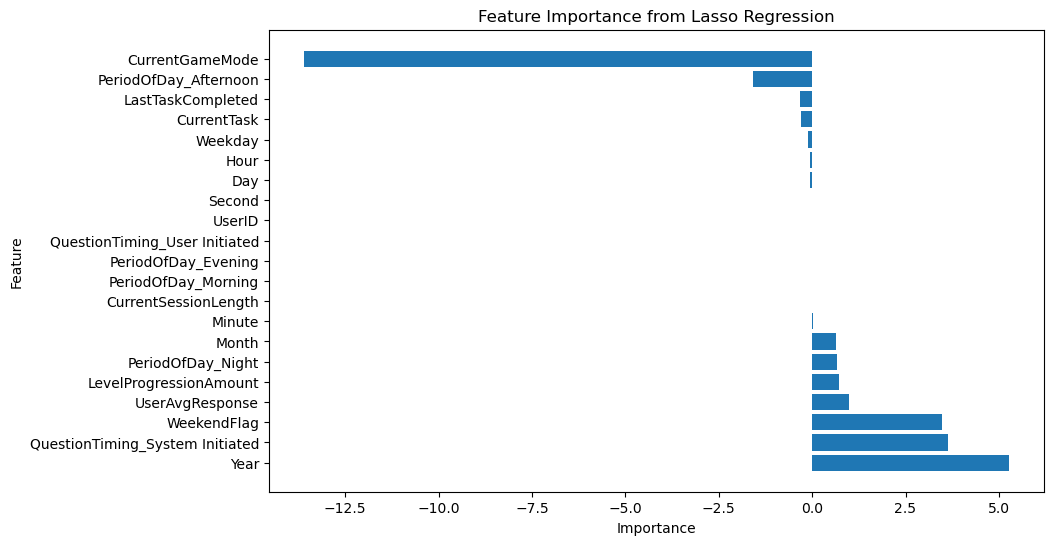

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file_path = 'train_data_knn_imputed.csv'  
final_data = pd.read_csv(file_path)

target = 'ResponseValue'
features = final_data.drop(columns=[target,'QuestionType'])
target_data = final_data[target]

X_train, X_test, y_train, y_test = train_test_split(features, target_data, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

coefficients = lasso.coef_

feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Lasso Regression')
plt.show()


#### XGBoost

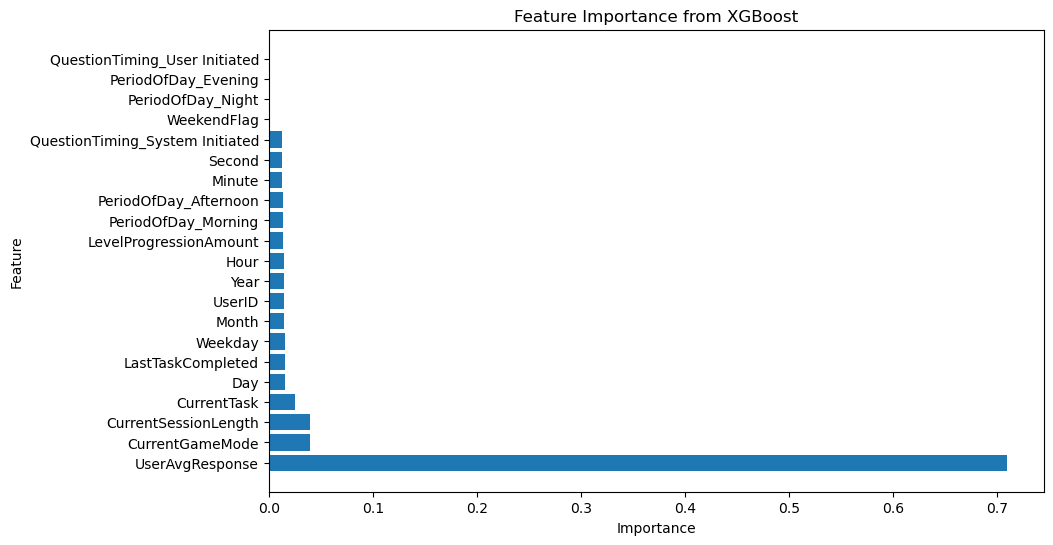

In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file_path = 'train_data_knn_imputed.csv' 
final_data = pd.read_csv(file_path)

target = 'ResponseValue'
features = final_data.drop(columns=[target,'QuestionType'])
target_data = final_data[target]

X_train, X_test, y_train, y_test = train_test_split(features, target_data, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

importance = xgb_model.feature_importances_

feature_importance_xgb = pd.DataFrame({'Feature': features.columns, 'Importance': importance})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgb['Feature'], feature_importance_xgb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.show()


# Test_data

In [34]:
test_data= pd.read_csv('data/test_data.csv')

### CurrentTask, LastTaskCompleted-Encoding 

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test_data_path = 'data/test_data.csv'
test_df = pd.read_csv(test_data_path)

label_encoder = LabelEncoder()

if test_df['CurrentTask'].dtype == 'object':
    test_df['CurrentTask'] = label_encoder.fit_transform(test_df['CurrentTask'].astype(str))

if test_df['LastTaskCompleted'].dtype == 'object':
    test_df['LastTaskCompleted'] = label_encoder.fit_transform(test_df['LastTaskCompleted'].astype(str))

output_file_path = 'test_data_knn_imputed.csv'
test_df.to_csv(output_file_path, index=False)


### CurrentTask, LastTaskCompleted-KNN

In [39]:
from sklearn.impute import KNNImputer

test_data = pd.read_csv('test_data_knn_imputed.csv')

# Select the two features 'CurrentTask_TargetEncoded' and 'LastTaskCompleted_TargetEncoded'
features_to_impute = ['CurrentTask', 'LastTaskCompleted']

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
imputed_data = imputer.fit_transform(test_data[features_to_impute])

# Transfer the filled data back to the DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=features_to_impute, index=test_data.index)

# Re-assign the filled features back to the original dataset
test_data[features_to_impute] = imputed_df[features_to_impute]

print("Processed testing data with imputed values:")
print(test_data.head())

# Save the imputed data to a new csv file
test_output_file_path = 'test_data_knn_imputed.csv'
test_data.to_csv(test_output_file_path, index=False)

Processed testing data with imputed values:
  UserID    QuestionTiming              TimeUtc CurrentGameMode  CurrentTask  \
0     p1  System Initiated  2022-08-28 15:50:22             NaN         50.0   
1     p1    User Initiated  2022-08-28 16:05:02          Career         32.0   
2     p1    User Initiated  2022-09-07 03:31:50             NaN         50.0   
3     p1  System Initiated  2022-09-08 01:30:05             NaN         50.0   
4     p1  System Initiated  2022-09-08 01:43:45          Career         32.0   

   CurrentSessionLength  LastTaskCompleted  LevelProgressionAmount  \
0                     0               51.0                     NaN   
1                    14               51.0                0.563458   
2                     0               51.0                     NaN   
3                     0               51.0                     NaN   
4                    13               51.0                0.829827   

  QuestionType  
0    Wellbeing  
1    Wellbeing  
2  

### CurrentGameMode-Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

# load the data
test_data = pd.read_csv('test_data_knn_imputed.csv')
print(test_data['CurrentGameMode'].unique())

# Initialize LabelEncoder
le = LabelEncoder()

# Encoding 'CurrentGameMode' using Label Encoding
test_data['CurrentGameMode'] = le.fit_transform(test_data['CurrentGameMode'])

[nan 'Career' 'FreePlay' 'Special' 'Challenge']


### CurrentGameMode-KNN

In [41]:
# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Select feature 'CurrentGameMode_LabelEncoded' to be imputed
features_to_impute = ['CurrentGameMode', 'CurrentTask']

# Impute the missing values
imputed_data = imputer.fit_transform(test_data[features_to_impute])

# Transfer the filled data back to the DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=features_to_impute, index=test_data.index)

# Re-new the original 'CurrentGameMode_LabelEncoded' data 
test_data['CurrentGameMode'] = imputed_df['CurrentGameMode']

print("Processed testing data with imputed CurrentGameMode:")
print(test_data.head())

# Save and renew the file
test_output_file_path = 'test_data_knn_imputed.csv'
test_data.to_csv(test_output_file_path, index=False)

Processed testing data with imputed CurrentGameMode:
  UserID    QuestionTiming              TimeUtc  CurrentGameMode  CurrentTask  \
0     p1  System Initiated  2022-08-28 15:50:22              4.0         50.0   
1     p1    User Initiated  2022-08-28 16:05:02              0.0         32.0   
2     p1    User Initiated  2022-09-07 03:31:50              4.0         50.0   
3     p1  System Initiated  2022-09-08 01:30:05              4.0         50.0   
4     p1  System Initiated  2022-09-08 01:43:45              0.0         32.0   

   CurrentSessionLength  LastTaskCompleted  LevelProgressionAmount  \
0                     0               51.0                     NaN   
1                    14               51.0                0.563458   
2                     0               51.0                     NaN   
3                     0               51.0                     NaN   
4                    13               51.0                0.829827   

  QuestionType  
0    Wellbeing  
1    

### TimeUtc-Convert Format

In [42]:
test_data = pd.read_csv("test_data_knn_imputed.csv")

# Ensure TimeUtc is a datetime type
test_data['TimeUtc'] = pd.to_datetime(test_data['TimeUtc'])

# Extract components
test_data['Year'] = test_data['TimeUtc'].dt.year
test_data['Month'] = test_data['TimeUtc'].dt.month
test_data['Day'] = test_data['TimeUtc'].dt.day
test_data['Hour'] = test_data['TimeUtc'].dt.hour
test_data['Minute'] = test_data['TimeUtc'].dt.minute
test_data['Second'] = test_data['TimeUtc'].dt.second

# Separate weekday and weekend days
test_data['Weekday'] = test_data['TimeUtc'].dt.dayofweek
test_data['WeekendFlag'] = (test_data['TimeUtc'].dt.weekday >= 5).astype(int)

# Categorize different times of day into periods
time_bins = [0, 6, 12, 18, 24]  # Define time_bins as 0-6, 6-12, 12-18, 18-24
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
test_data['PeriodOfDay'] = pd.cut(test_data['TimeUtc'].dt.hour, bins=time_bins, labels=time_labels, right=False)

# Remove the original Timestamp column to avoid redundancy
test_data.drop('TimeUtc', axis=1, inplace=True)


### TimeUtc-Encoding

In [43]:
#encoding for TimeOfDay.
test_data = pd.get_dummies(test_data, columns=['PeriodOfDay'], drop_first=False)

test_data.head()

,UserID,QuestionTiming,CurrentGameMode,CurrentTask,CurrentSessionLength,LastTaskCompleted,LevelProgressionAmount,QuestionType,Year,Month,Day,Hour,Minute,Second,Weekday,WeekendFlag,PeriodOfDay_Night,PeriodOfDay_Morning,PeriodOfDay_Afternoon,PeriodOfDay_Evening
0,p1,System Initiated,4.0,50.0,0,51.0,NaN,Wellbeing,2022,8,28,15,50,22,6,1,False,False,True,False
1,p1,User Initiated,0.0,32.0,14,51.0,0.563458,Wellbeing,2022,8,28,16,5,2,6,1,False,False,True,False
2,p1,User Initiated,4.0,50.0,0,51.0,NaN,Wellbeing,2022,9,7,3,31,50,2,0,True,False,False,False
3,p1,System Initiated,4.0,50.0,0,51.0,NaN,Wellbeing,2022,9,8,1,30,5,3,0,True,False,False,False
4,p1,System Initiated,0.0,32.0,13,51.0,0.829827,Wellbeing,2022,9,8,1,43,45,3,0,True,False,False,False


In [44]:
# Save the transformation and encoding for 'TimeUtc' to the 'train_data_knn_imputed.csv' 
test_output_file_path = 'test_data_knn_imputed.csv'
test_data.to_csv(test_output_file_path, index=False)

### LevelProgressionAmount-KNN

In [45]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read the CSV file
file_path = 'test_data_knn_imputed.csv'
df = pd.read_csv(file_path)

# Select the column to encode and impute
column_to_encode_and_impute = 'LevelProgressionAmount'

# Encode the column
label_encoder = LabelEncoder()
df[column_to_encode_and_impute] = label_encoder.fit_transform(df[column_to_encode_and_impute].astype(str))

# Create KNNImputer instance
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation on the selected column
df[[column_to_encode_and_impute]] = imputer.fit_transform(df[[column_to_encode_and_impute]])

# Standardize the imputed column
scaler = StandardScaler()
df[[column_to_encode_and_impute]] = scaler.fit_transform(df[[column_to_encode_and_impute]])

# Save the modified data back to the original file
df.to_csv(file_path, index=False)

print(f'Successfully encoded and performed KNN imputation on {column_to_encode_and_impute}. The result has been saved back to the original file {file_path}')


Successfully encoded and performed KNN imputation on LevelProgressionAmount. The result has been saved back to the original file test_data_knn_imputed.csv


### QuestionTiming-Dummy

In [46]:
import pandas as pd

file_path = 'test_data_knn_imputed.csv'
df = pd.read_csv(file_path)

df_encoded = pd.get_dummies(df, columns=['QuestionTiming'])

df_encoded.to_csv(file_path, index=False)

print(f'{file_path}')

test_data_knn_imputed.csv


### Adding UserAvgResponse

In [47]:
import pandas as pd

train_data_path = 'data/train_data.csv'
train_df = pd.read_csv(train_data_path)

user_means = train_df.groupby('UserID')['ResponseValue'].mean()

global_mean = train_df['ResponseValue'].mean()

test_data_path = 'test_data_knn_imputed.csv'
test_df = pd.read_csv(test_data_path)

test_df['UserAvgResponse'] = test_df['UserID'].map(user_means)

test_df['UserAvgResponse'].fillna(global_mean, inplace=True)

test_df.to_csv(test_data_path, index=False)

print(f'successfully add {test_data_path}')

successfully add test_data_knn_imputed.csv


# Model

### Hyperparameter Tuning

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

data_path = 'train_data_knn_imputed.csv'
data = pd.read_csv(data_path)

features = [
    "CurrentSessionLength", "CurrentGameMode", "CurrentTask",
    "LastTaskCompleted", "LevelProgressionAmount", "Month", "Year",
    "WeekendFlag", "PeriodOfDay_Night", "QuestionTiming_System Initiated", "UserAvgResponse"
]
X = data[features]
y = data['ResponseValue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
search_spaces = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(5, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10)
}

opt = BayesSearchCV(rf, search_spaces, n_iter=32, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', random_state=42)

opt.fit(X_train, y_train)

print("Best parameters:", opt.best_params_)

best_rf = opt.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))


Best parameters: OrderedDict([('max_depth', 41), ('min_samples_leaf', 3), ('min_samples_split', 20), ('n_estimators', 397)])
Mean Squared Error: 16129.3563


### LightGBM

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb

data_path = 'train_data_knn_imputed.csv'
data = pd.read_csv(data_path)

features = [
    "CurrentSessionLength", "CurrentGameMode", "CurrentTask",
    "LastTaskCompleted", "LevelProgressionAmount", "Month", "Year",
    "WeekendFlag", "PeriodOfDay_Night", "QuestionTiming_System Initiated", "UserAvgResponse"
]
X = data[features]
y = data['ResponseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'mae'],
    'num_leaves': 41,  
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'max_depth': 41,  
    'min_data_in_leaf': 3,  
    'min_split_gain': 20,  
    'n_estimators': 397 
}

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], callbacks=[lgb.early_stopping(stopping_rounds=10)])

y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mae}")


D:\Software\Anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[145]	valid_0's l2: 16601.1	valid_0's l1: 87.9432
Mean Squared Error: 16601.079816411584
R-squared Score: 0.6321594482685471
Mean Absolute Error: 87.94319361282112


In [51]:
import pandas as pd
import lightgbm as lgb


test_data_path = 'test_data_knn_imputed.csv'  
test_data = pd.read_csv(test_data_path)

features = [
    "CurrentSessionLength", "CurrentGameMode", "CurrentTask",
    "LastTaskCompleted", "LevelProgressionAmount", "Month", "Year",
    "WeekendFlag", "PeriodOfDay_Night", "QuestionTiming_System Initiated", "UserAvgResponse"
]
X_test = test_data[features]

y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

predicted_data = pd.DataFrame(y_pred)

output_file_path = 'predicted.csv'
predicted_data.to_csv(output_file_path, index=False, header=False)

print(f"Predicted data saved to: {output_file_path}")

Predicted data saved to: predicted.csv
